In [1]:
# !pip install matplotlib pillow numpy

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
from gtts import gTTS
from playsound import playsound
from IPython.display import Audio

In [13]:
model = load_model("new_cnn_model.h5")  

In [19]:
image_path = "predict4.jpg"
image = cv2.imread(image_path)

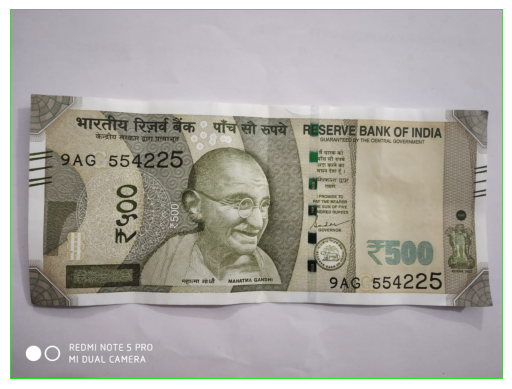

In [20]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Find the contours
contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty image to draw the contours on
contour_image = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)

# Convert the BGR image to RGB for displaying with Matplotlib
contour_image_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)

# Display the image with contours
plt.imshow(contour_image_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()

In [21]:
# Find and crop the region of interest based on the largest contour
x, y, w, h = cv2.boundingRect(contours[0])
cropped_image = image[y:y + h, x:x + w]

# Save the cropped image
cv2.imwrite("cropped_image.png", cropped_image)
cv2.imshow("Cropped Image", cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
cropped_image = Image.open("cropped_image.png")
cropped_image = cropped_image.resize((150, 150))  # Resize to match the model's input size
cropped_image = np.array(cropped_image)  # Convert to a NumPy array
cropped_image = np.expand_dims(cropped_image, axis=0)  # Add a batch dimension

In [23]:
# Make predictions using the model
predictions = model.predict(cropped_image)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Define your class labels
class_labels = ["10", "100", "20", "200", "2000", "50", "500"]

# Get the predicted class and probability
predicted_class = class_labels[predicted_class_index]
probability = predictions[0][predicted_class_index]

# Get the predicted class label
predicted_class = class_labels[predicted_class_index]
probability = predictions[0][predicted_class_index]

print("Predicted Class:", predicted_class)
print("Probability:", probability)

1/1 [==============================] - 0s 47ms/step
Predicted Class: 500
Probability: 1.0


In [24]:
text = "Currency Detected is" + predicted_class + "Rupees"
tts = gTTS(text)
tts.save("output.mp3")
Audio("output.mp3", autoplay = True)